In [2]:
import scipy.stats as st
import pandas as pd 
import matplotlib.pyplot as plt 

In [3]:
# feminino 
df = pd.read_excel('aps_5_cdados.xlsx')
df = df.set_index("Ano")
df_p_fem = df.iloc[5]
x_barra_fem = df_p_fem.mean()
sigma_fem = df_p_fem.std(ddof=1)

In [4]:
# n = amostra
# x_barra_fem = media 
# sigma_fem = np.std(n,ddof =1)
n=10 
c_min_fem = st.t.ppf(0.025, df=n-1, scale=sigma_fem,loc=x_barra_fem)
c_max_fem = st.t.ppf(1-0.025, df=n-1, scale=sigma_fem,loc=x_barra_fem) 
intervalo_de_confianca_fem = (c_min_fem, c_max_fem)
print(intervalo_de_confianca_fem)

(0.030540876599375995, 0.11228564209269451)


In [5]:
# masculino
df_p_masc = df.iloc[4]
x_barra_masc = df_p_masc.mean()
sigma_masc = df_p_masc.std(ddof=1)

In [6]:
n=10 
c_min_masc = st.t.ppf(0.025, df=n-1, scale=sigma_masc,loc=x_barra_masc)
c_max_masc = st.t.ppf(1-0.025, df=n-1, scale=sigma_masc,loc=x_barra_masc) 
intervalo_de_confianca_masc = (c_min_masc, c_max_masc)
print(intervalo_de_confianca_masc)

(0.05505928773659824, 0.13232570060376642)


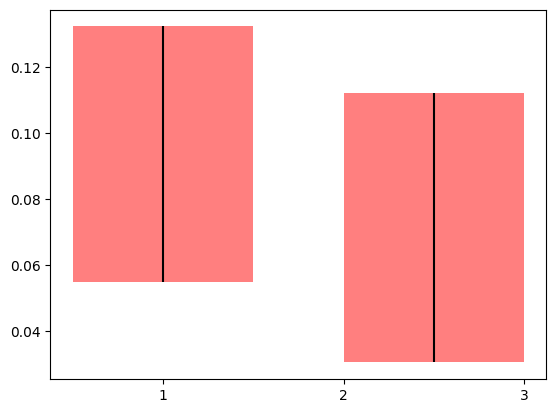

In [9]:
import matplotlib.pyplot as plt 
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection

medio_masc = (c_min_masc+c_max_masc)/2
x_masc=[1]
y_masc=[medio_masc]
yerror_masc = medio_masc - c_min_masc

medio_fem = (c_min_fem+c_max_fem)/2
x_fem=[2.5]
y_fem=[medio_fem]
yerror_fem = medio_fem - c_min_fem

fig, ax = plt.subplots(1)
plt.xticks([0,1,2,3,4,5,6,])
plt.yticks([0.02,0.04,0.06,0.08,0.10,0.12,0.14])
errorboxes = [Rectangle((0.5, c_min_masc), 1,c_max_masc - c_min_masc),Rectangle((2., c_min_fem), 1, c_max_fem - c_min_fem)]
    # Create patch collection with specified colour/alpha
pc = PatchCollection(errorboxes, facecolor='r', alpha=0.5,
                         edgecolor=None)
ax.add_collection(pc)
ax.errorbar(x_masc,y_masc,yerr=yerror_masc,fmt='none', ecolor='k')
ax.errorbar(x_fem,y_fem,yerr=yerror_fem,fmt='none', ecolor='k')

plt.show()